In [47]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/4213 Assignment 1/final_code/latest_hdb.csv', index_col='Unnamed: 0')

In [ ]:
dis_ = pd.read_csv('new_HDB_data_w_distance.csv')
#dis_.info()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df.shape

(857396, 13)

In [11]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,market,region,mature,dist to mrt,dist to mall,storey_med
0,1990-01-01,ANG MO KIO,3 ROOM,73.0,new generation,1976,47200.0,0,northeast,1,0.986748,0.843877,5.0
1,1990-01-01,ANG MO KIO,3 ROOM,67.0,new generation,1977,46000.0,0,northeast,1,0.880909,0.755938,2.0
2,1990-01-01,ANG MO KIO,3 ROOM,67.0,new generation,1977,42000.0,0,northeast,1,0.584237,0.447619,8.0
3,1990-01-01,ANG MO KIO,3 ROOM,67.0,new generation,1977,38000.0,0,northeast,1,1.492898,1.357627,11.0
4,1990-01-01,ANG MO KIO,3 ROOM,67.0,new generation,1977,40000.0,0,northeast,1,1.492898,1.357627,5.0


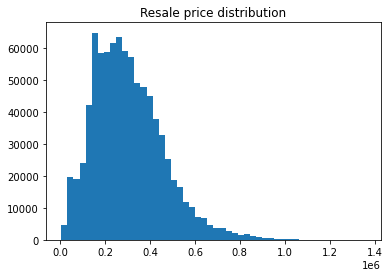

In [ ]:
plt.hist(df['resale_price'], bins=50)
plt.title('Resale price distribution')
plt.show()


We can see that the distribution of resale HDB price is rightly skewed. Since regression model assume normality, we consider performing log transform on resale HDB price to make it closer to normal distribution.

In [ ]:
# map dist to nearest mrt
mappin = dict(dis_[['full_address', 'dist to mrt']].values)
df['dist to mrt'] = df.address.map(mappin)

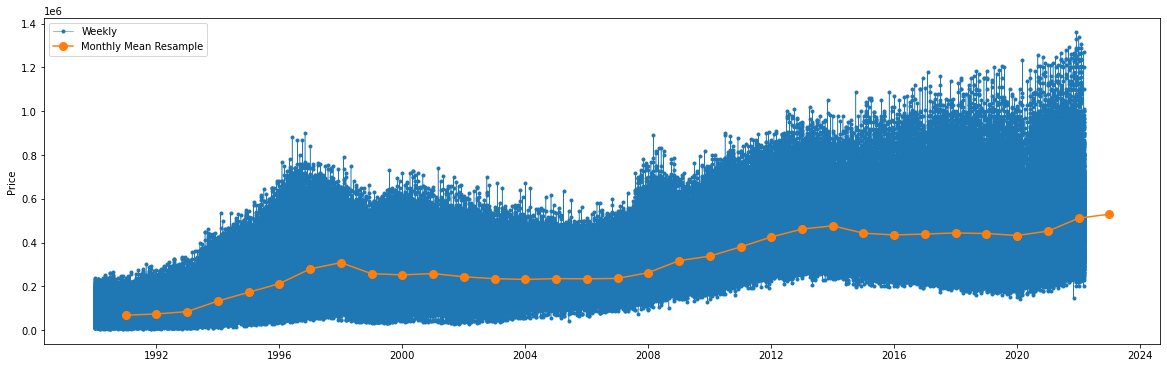

In [ ]:
df1 = df.copy()
df1['month'] = pd.to_datetime(df1['month'])
df1.set_index('month', inplace=True)
y = df1['resale_price']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Price')
ax.legend()

In [ ]:
y.isnull().sum()

0

In [ ]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq', period=2)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

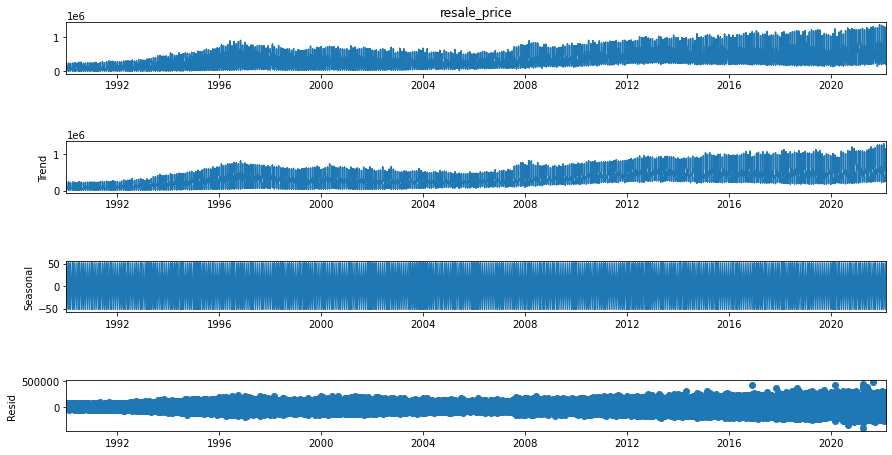

In [ ]:
seasonal_decompose(y)

In [ ]:
# map dist to nearest mall
mappin = dict(dis_[['full_address', 'dist to mall']].values)
df['dist to mall'] = df.address.map(mappin)

In [ ]:
r_list = df['storey_range'].unique()
storey_d = {}
for i in r_list:
    if i not in storey_d:
        med_storey = .5*(float(i.split()[0])+float(i.split()[2]))
        storey_d[i] = med_storey

In [ ]:
df.replace({'flat_type': 'MULTI-GENERATION'}, {'flat_type': 'MULTI GENERATION'}, regex=True, inplace = True)

In [ ]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI GENERATION'], dtype=object)

In [ ]:
df['storey_med'] = df['storey_range'].map(storey_d)
market_d = {
    'N':0,
    'Y':1
}

df['market'] = df['market'].map(market_d)

There are some inaccurate data which causes extreme values. Thus, we will have to remove them.

In [48]:
df = df.drop(df[df['dist to mall'] >= 3].index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857396 entries, 0 to 857395
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                857396 non-null  object 
 1   town                 857396 non-null  object 
 2   flat_type            857396 non-null  object 
 3   floor_area_sqm       857396 non-null  float64
 4   flat_model           857396 non-null  object 
 5   lease_commence_date  857396 non-null  int64  
 6   resale_price         857396 non-null  float64
 7   market               857396 non-null  int64  
 8   region               857396 non-null  object 
 9   mature               857396 non-null  int64  
 10  dist to mrt          857396 non-null  float64
 11  dist to mall         857396 non-null  float64
 12  storey_med           857396 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 85.0+ MB


In [49]:
#df_new = df.drop(df[df['month'] <= '2017-03-01'].index).reset_index(drop=True)

In [ ]:
drop_l = ['block','street_name','lat','lati','lon','address','storey_range','age']
df = df.drop(drop_l,axis=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857396 entries, 0 to 857395
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                857396 non-null  object 
 1   town                 857396 non-null  object 
 2   flat_type            857396 non-null  object 
 3   floor_area_sqm       857396 non-null  float64
 4   flat_model           857396 non-null  object 
 5   lease_commence_date  857396 non-null  int64  
 6   resale_price         857396 non-null  float64
 7   market               857396 non-null  int64  
 8   region               857396 non-null  object 
 9   mature               857396 non-null  int64  
 10  dist to mrt          857396 non-null  float64
 11  dist to mall         857396 non-null  float64
 12  storey_med           857396 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 85.0+ MB


In [52]:
#Prepare our X and y data for regression:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [53]:
pipeline = ColumnTransformer([
                              ('o', OrdinalEncoder(), ['month','flat_type']),
                              ('n', OneHotEncoder(), ['flat_model','town','region']),
], remainder='passthrough')

X = pipeline.fit_transform(df.drop(['resale_price'],axis=1))
y = df['resale_price']

In [9]:
import pickle

In [10]:
pickle.dump(pipeline, open('lr_encoder.pkl', 'wb'))

In [54]:
col_name = ["month",'type','2-room','adjoined flat', 'apartment', 'dbss', 'improved', 'improved-maisonette', 'maisonette', 'model a', 'model a-maisonette', 'model a2', 'multi generation', 'new generation', 'premium apartment', 'premium apartment loft', 'premium maisonette', 'simplified', 'standard', 'terrace', 'type s1', 'type s2',"AMK","BED","BIS","BBT","BMH","BPJ",
"BTM","CEN","CCK","CLE","GEY","HOU","JRE","JRW","KAL","MAR",
"PAS","PUN","QUE","SEM","SKG","SER","TAM","TOA","WOO",
"YIS", 'central', 'east', 'north', 'northeast', 'west',"Area","Lease","market\hawker?","town maturity","dist to mrt","dist to mall","storey"]


df_X = pd.DataFrame(X.toarray(),columns=col_name)
df_X['resale_price'] = y.to_numpy()

# df_Xy = df_X.assign(resale_price = y)
df_X.head()

,month,type,2-room,adjoined flat,apartment,dbss,improved,improved-maisonette,maisonette,model a,...,northeast,west,Area,Lease,market\hawker?,town maturity,dist to mrt,dist to mall,storey,resale_price
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,73.0,1976.0,0.0,1.0,0.986748,0.843877,5.0,47200.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,67.0,1977.0,0.0,1.0,0.880909,0.755938,2.0,46000.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,67.0,1977.0,0.0,1.0,0.584237,0.447619,8.0,42000.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,67.0,1977.0,0.0,1.0,1.492898,1.357627,11.0,38000.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,67.0,1977.0,0.0,1.0,1.492898,1.357627,5.0,40000.0


In [55]:
period = [3,6,12,24]

def test_train(df_X, m):
    df_test = df_X[df_X.month == m]
    X_test = df_test.drop(["resale_price"], axis=1)
    y_test = df_test.resale_price
    df_train = df_X[(df_X.month >= 0) & (df_X.month <= (m-1))]
    X_train = df_train.drop(["resale_price"], axis=1)
    y_train = df_train.resale_price

    return X_train,X_test,y_train,y_test


In [16]:
X_test.head()

NameError: ignored

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error
from math import sqrt

In [56]:
def run_model(func):
    m = [6,12,36,60]
    mse = []
    r_sq_train = []
    r_sq_pred = []
    for i in m:
        X_train,X_test,y_train,y_test = func(df_X, i)

        scaler = StandardScaler()

        pipeline1 = Pipeline([
            #('transformer', transformer),
            ("standard Scaling", scaler),
            ("poly", PolynomialFeatures(degree = 2)),
            # ("MinMax Scaling", MinMaxScaler()),
            ("Regression", Ridge(alpha=2)),
        ])

        pipeline1.fit(X_train, np.log(y_train))
        print("R-sq of model: ", pipeline1.score(X_train, np.log(y_train)))
        r_sq_train.append(pipeline1.score(X_train, np.log(y_train)))
        pred = pipeline1.predict(X_test)
        print("RMSE: %.2f" % sqrt(mean_squared_error(pred, np.log(y_test))))
        mse.append(sqrt(mean_squared_error(pred, np.log(y_test))))
        print("R-sq of predictions: ", r2_score(np.log(y_test), pred))
        r_sq_pred.append(r2_score(np.log(y_test), pred))


        # steps = [('scaler', scaler),('Ridge', Ridge())]
        # params = {'Ridge__alpha':np.arange(0.5,100.5,0.5)}
        # pipeline = Pipeline(steps)
        # grid = GridSearchCV(pipeline, param_grid=params, cv=5)
        # grid.fit(X_train,np.log(y_train))
        # print('Ridge Cross Validated R^2:',np.mean(cross_val_score(grid,X_test,np.log(y_test))))
        # print('Best alpha for month %d is %f ' % (i ,grid.best_params_))

    return r_sq_train, r_sq_pred, mse

# s = [6,12,36,60]
r_sq_train, r_sq_pred, mse = run_model(test_train)
# plt.plot(s, r_sq_train)
# plt.plot(s, r_sq_pred)
# plt.legend(['R-sq of model','R-sq of predictions'])
# plt.show()
#print(r_sq_pred)

R-sq of model:  0.9545388538515791
RMSE: 0.14
R-sq of predictions:  0.9445751111041706
R-sq of model:  0.9493269272694768
RMSE: 0.13
R-sq of predictions:  0.9398492841318361
R-sq of model:  0.9289380684241049
RMSE: 0.21
R-sq of predictions:  0.8771637358017675
R-sq of model:  0.9405710816816215
RMSE: 0.22
R-sq of predictions:  0.8294929206781111


In [22]:
pickle.dump(pipeline, open('best_ridge_poly.pkl', 'wb'))

In [11]:
np.log(233000)

12.358793732547838

In [44]:
X_train,X_test,y_train,y_test = test_train(df_X, 60)

scaler = StandardScaler()

pipeline1 = Pipeline([
    #('transformer', transformer),
    #("standard Scaling", scaler),
    ("MinMax Scaling", MinMaxScaler()),
    # ("poly", PolynomialFeatures(degree = 2)),
    ("Regression", LinearRegression()),
    # ("Regression", Ridge(alpha=2.5)),
])

pipeline1.fit(X_train, np.log(y_train))
print("R-sq of model: ", pipeline1.score(X_train, np.log(y_train)))
pred = pipeline1.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(pred, np.log(y_test)))
print("R-sq of predictions: ", r2_score(np.log(y_test), pred))


R-sq of model:  0.8907354455952655
RMSE: 0.34
R-sq of predictions:  -0.23091550356869117


In [46]:
X_test

,month,type,2-room,adjoined flat,apartment,dbss,improved,improved-maisonette,maisonette,model a,...,north,northeast,west,Area,Lease,market\hawker?,town maturity,dist to mrt,dist to mall,storey
81272,60.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,69.0,1986.0,0.0,1.0,1.280320,1.439377,5.0
81273,60.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,82.0,1976.0,0.0,1.0,0.978625,0.840821,11.0
81274,60.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,73.0,1976.0,0.0,1.0,0.958323,0.816326,5.0
81275,60.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,73.0,1976.0,0.0,1.0,0.958323,0.816326,5.0
81276,60.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,82.0,1976.0,0.0,1.0,1.020300,0.875762,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83302,60.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,146.0,1988.0,0.0,0.0,1.579916,0.972447,8.0
83303,60.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,146.0,1988.0,0.0,0.0,1.210017,0.772777,5.0
83304,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,171.0,1987.0,0.0,0.0,0.775735,0.171385,5.0
83305,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,151.0,1987.0,0.0,0.0,0.775735,0.171385,5.0


In [32]:
X_train

,month,type,2-room,adjoined flat,apartment,dbss,improved,improved-maisonette,maisonette,model a,...,north,northeast,west,Area,Lease,market\hawker?,town maturity,dist to mrt,dist to mall,storey
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,73.0,1976.0,0.0,1.0,0.986748,0.843877,5.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,67.0,1977.0,0.0,1.0,0.880909,0.755938,2.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,67.0,1977.0,0.0,1.0,0.584237,0.447619,8.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,67.0,1977.0,0.0,1.0,1.492898,1.357627,11.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,67.0,1977.0,0.0,1.0,1.492898,1.357627,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81267,59.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,148.0,1988.0,0.0,0.0,1.632764,1.154075,5.0
81268,59.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,146.0,1988.0,0.0,0.0,1.574495,0.930061,2.0
81269,59.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,146.0,1988.0,0.0,0.0,1.061985,0.783772,5.0
81270,59.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,146.0,1988.0,0.0,0.0,1.149543,0.817697,11.0


In [20]:
import pickle

In [21]:
pickle.dump(pipeline1, open('best_ridge_poly.pkl', 'wb'))

<AxesSubplot:>

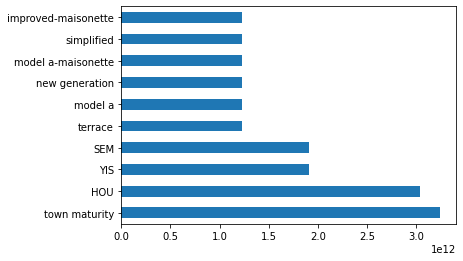

In [ ]:
(pd.Series(pipeline1['Regression'].coef_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [ ]:
p = 60
df_test = df_X[df_X.month == p]
X_test = df_test.drop(["resale_price"], axis=1)
y_test = df_test.resale_price
df_train = df_X[(df_X.month >= 0) & (df_X.month <= (p-1))]
X_train = df_train.drop(["resale_price"], axis=1)
y_train = df_train.resale_price

In [ ]:


p_pipeline = Pipeline([
    #('transformer', transformer),
    ("poly", PolynomialFeatures(degree = 2)),
    ("Regression", Ridge(alpha=2)),
])

p_pipeline.fit(X_train, np.log(y_train))
print("R-sq of model: ", p_pipeline.score(X_train, np.log(y_train)))
pred = p_pipeline.predict(X_test)
print("RMSE: %.2f" % sqrt(mean_squared_error(pred, np.log(y_test))))
print("R-sq of predictions: ", r2_score(np.log(y_test), pred))


R-sq of model:  0.9493269556599454
RMSE: 938.72
R-sq of predictions:  -3008506.1688001114


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
svmr = LinearSVR(epsilon=0, C=100, max_iter=1000000, random_state=0).fit(X_train, y_train)
print("R-sq of model: ", svmr.score(X_train, np.log(y_train)))
pred = svmr.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(np.log(y_test), pred))
print("R-sq of predictions: ", r2_score(np.log(y_test), pred))

R-sq of model:  0.8948549471500347
RMSE: 191204895.10
R-sq of predictions:  0.9008723954224308


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
svmr = LinearSVR(epsilon=0, C=1, max_iter=1000000, random_state=0).fit(X_train, np.log(y_train))
print("R-sq of model: ", svmr.score(X_train, np.log(y_train)))
pred = svmr.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(np.log(y_test), pred))
print("R-sq of predictions: ", r2_score(np.log(y_test), pred))

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score

X_train,X_test,y_train,y_test = test_train(df_X, 60)

svmr = LinearSVR(epsilon=0, C=1, max_iter=1000000, random_state=0).fit(X_train, np.log(y_train))
print("R-sq of model: ", svmr.score(X_train, np.log(y_train)))
pred = svmr.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(np.log(y_test), pred))
print("R-sq of predictions: ", r2_score(np.log(y_test), pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = test_train(df_X, 6)

steps = [('scaler', scaler),("poly", PolynomialFeatures(degree = 2)),('Ridge', Ridge())]
params = {'Ridge__alpha':np.arange(0.5,50.5,0.5)}
pipeline = Pipeline(steps)
grid = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs = -1)
grid.fit(X_train,np.log(y_train))
print('Ridge Cross Validated R^2:',np.mean(cross_val_score(grid,X_test,np.log(y_test))))


Ridge Cross Validated R^2: 0.4771880786841235


In [ ]:
grid.best_params_

{'Ridge__alpha': 2.5}

In [ ]:
#pickle.dump(model, open('model.pkl', 'wb'))
